## TensorFlow中的深度神经网络
### 代码
#### TensorFlow MNIST

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('.', one_hot = True, reshape = False)

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


使用TensorFlow提供的MNIST数据集，它把分批和独热码都处理好了。  
### 学习参数 Learning Parameters

In [5]:
import tensorflow as tf  
## 参数 Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 128 # 如果没有足够内存，可以降低batch size
display_step = 1

n_input = 784 # MNIST data input(img shape: 28*28)
n_classes = 10 # MNIST total classes(0-9 digits)

### 隐藏层参数 Hidden Layer Parameters

In [6]:
n_hidden_layer = 256 # 特征的层数

n_hidden_layer 决定了神经网络隐藏层的大小，也被称作层的宽度。   
### 权重和偏置项 

In [12]:
# Store layers weight and bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input,n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

深层神经网络有多个层，每个层有自己的权重和偏置项。'hidden_layer'的权重和偏置项只属于隐藏层，'out'的权重和偏置项只属于输出层。如果神经网络比这更深，那每一层都有权重和偏置项。
### 输入 Input

In [13]:
# tf Graph input
x = tf.placeholder('float',[None,28,28,1])
y = tf.placeholder('float',[None, n_classes])   

x_flat = tf.reshape(x,[-1, n_input])

MNIST 数据集是由 28px *28px单通道图片组成。tf.reshape()函数把 28px *28px的矩阵转换为784px*1px的单行向量x。
### 多层感知器 Multilayer Perceptron

In [15]:
# ReLU 作为隐藏层激活函数
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']),biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

#输出层的线性激活函数
logits = tf.add(tf.matmul(layer_1, weights['out']),biases['out'])

tf.add(tf.matmul(x_flat, weights['hidden_layer']),biases['hidden_layer']),就是xW+b。把线性函数与ReLU组合在一起，形成一个2层网络。
### 优化器 Optimizer

In [16]:
# 定义误差值和优化器

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, 
                                                              labels = y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

### Session

In [18]:
# 初始化变量
init = tf.global_variables_initializer()

# 启动图
with tf.Session() as sess:
    sess.run(init)
    # 训练循环
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历所有batch
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # 运行优化器进行反向传导，计算cost（获取loss的值）
            sess.run(optimizer, feed_dict = {x: batch_x, y: batch_y})

TensorFlow中的MNIST库提供了分批接收数据的能力。调用mnist.train.next_batch()函数返回训练数据的一个子集。  
## 保存和读取 TensorFlow 模型  
训练一个模型的时间很长。但是你一旦关闭了TensorFlow session, 你所有训练的权重和偏置项都丢失了。如果你计划在之后重新使用这个模型，你需要重新训练！  
幸运的是， TensorFlow 可以让你通过一个叫 tf.train.Saver的类把你的进程保存下来，这个累可以把任何 tf.Variable 存到你的文件系统。  
### 保存变量  
让我们通过一个简单的例子来保存 weights和 bias Tensors。 第一个例子你只是存两个变量，后面会教你如何把一个实际模型的所有权重保存下来。  

In [32]:
import tensorflow as tf 

# 文件保存路径
save_file = '.model/ckpt'

# 两个Tensor 变量： 权重和偏置项
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

# 用来存取 Tensor 变量的类
saver = tf.train.Saver()

with tf.Session() as sess:
    # 初始化所有变量
    sess.run(tf.global_variables_initializer())
    
    # 显示变量和权重
    print('weights:')
    print(sess.run(weights))
    print('Bias:')
    print(sess.run(bias))
    
    # 保存模型
    saver.save(sess, save_file)

weights:
[[-0.35832396 -1.99825037  0.14570355]
 [-1.41003752 -1.92391455 -1.036587  ]]
Bias:
[ 0.12552246 -1.36862433  0.75178486]


weights 和 bias Tensors 用tf.truncated_normal()函数设定了随机值。用tf.train.Saver.save()函数把这些值被保存在save_file位置，命名为'model.ckpt',('.ckpt'扩展名表示'checkpoint')。  
## 加载变量  
现在这些变量已经存好了，让我们把它们加载到新模型里。  

In [33]:
# Remove the previous weights and bias
# 移除之前的权重和偏置项  
tf.reset_default_graph()

# 两个变量： 权重和偏置项  
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

# 用来存取Tensor变量的类
saver = tf.train.Saver()

with tf.Session() as sess:
    # 加载权重和偏置项
    saver.restore(sess, save_file)
    
    # 显示权重和偏置项
    print('weight:')
    print(sess.run(weights))
    print('bias:')
    print(sess.run(bias))

INFO:tensorflow:Restoring parameters from .model/ckpt
weight:
[[ 0.15636076 -0.66142511 -0.45238689]
 [-0.92793959 -0.45580754  0.11625437]]
bias:
[-0.28037843  0.49187064 -0.09098915]


### 保存一个训练好的模型

In [37]:
# Remove previous Tensors and Operations
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

learning_rate = 0.001
n_input = 784
n_classes = 10

# Import MNIST data
mnist = input_data.read_data_sets('.', one_hot = True)

# Features and Labels
features = tf.placeholder(tf.float32, [None, n_input])
labels = tf.placeholder(tf.float32, [None, n_classes])

# weights and bias
weights = tf.Variable(tf.random_normal([n_input, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

# logits - xW+b
logits = tf.add(tf.matmul(features, weights),bias)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = labels ))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)

# calcuate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


### 让我们训练模型并保存权重

In [38]:
import math

save_file = './train_model.ckpt'
batch_size = 128
n_epochs = 100

saver = tf.train.Saver()

# Launch the graph
# 启动图
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # 训练循环
    for epoch in range(n_epochs):
        total_batch = math.ceil(mnist.train.num_examples/batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_features, batch_labels = mnist.train.next_batch(batch_size)
            
            sess.run(optimizer, feed_dict ={features: batch_features, labels: batch_labels})
            
        # 每运行10个epoch 打印一次状态
        if epoch % 10 == 0:
            valid_accuracy = sess.run(accuracy, feed_dict = {features: mnist.validation.images,
                                                            labels: mnist.validation.labels})
            print('Epoch {:<3}- Validation Accuracy: {}'.format(epoch,valid_accuracy))
    # 保存模型
    saver.save(sess, save_file)
    print('Trained Model Saved.')

Epoch 0  - Validation Accuracy: 0.07240000367164612
Epoch 10 - Validation Accuracy: 0.225600004196167
Epoch 20 - Validation Accuracy: 0.38440001010894775
Epoch 30 - Validation Accuracy: 0.4830000102519989
Epoch 40 - Validation Accuracy: 0.5432000160217285
Epoch 50 - Validation Accuracy: 0.5892000198364258
Epoch 60 - Validation Accuracy: 0.6244000196456909
Epoch 70 - Validation Accuracy: 0.6516000032424927
Epoch 80 - Validation Accuracy: 0.6714000105857849
Epoch 90 - Validation Accuracy: 0.6899999976158142
Trained Model Saved.


### 加载训练好的模型
让我们从磁盘中加载权重和偏置项，验证测试准确率。

In [39]:
saver = tf.train.Saver()

# 加载图
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_accuracy = sess.run(accuracy, feed_dict = {features: mnist.test.images,
                                                   labels: mnist.test.labels})
    print('Test Accuracy: {}'.format(test_accuracy))
    

INFO:tensorflow:Restoring parameters from ./train_model.ckpt
Test Accuracy: 0.7174999713897705


## 把权重和偏置项加载到新模型中  
很多时候想要调整，或者说"微调"一个你已经训练并保存了的模型。但是，把保存的变量直接加载到已经修改过的模型会产生错误。
### 命名报错
TensorFlow 对Tensor和计算使用一个叫**name**的字符串辨识器，如果没有定义name, TensorFlow会自动创建一个。TensorFlow会把第一个节点命名为$<Type>$,把后续的命名为$<Type>\_<number>$。让我们看看这对加载一个有不同顺序权重和偏置项的模型有哪些影响。

In [46]:
import tensorflow as tf

# 移除先前的权重和偏置项
tf.reset_default_graph()

save_file = './model.ckpt'

# 两个tensor 变量：权重和偏置项
weights = tf.Variable(tf.truncated_normal([2,3]))
bias = tf.Variable(tf.truncated_normal([3]))

saver = tf.train.Saver()

# 打印权重和偏置项的名字
print('Save Weights: {}'.format(weights.name))
print('Save bias: {}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.save(sess, save_file)
    
# 移除之前的权重和偏置项
tf.reset_default_graph()

# 两个变量：权重和偏置项
bias = tf.Variable(tf.truncated_normal([3]))
weights = tf.Variable(tf.truncated_normal([2,3]))  

saver = tf.train.Saver()

# 打印权重和偏置项的名字

print('Load Weights: {}'.format(weights.name))
print('Load Bias: {}'.format(bias.name))

with tf.Session() as sess:
    # 加载权重和偏置项，报错
    saver.restore(sess,save_file)

Save Weights: Variable:0
Save bias: Variable_1:0
Load Weights: Variable_1:0
Load Bias: Variable:0
INFO:tensorflow:Restoring parameters from ./model.ckpt


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [2,3] rhs shape= [3]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_1, save/RestoreV2_1)]]

Caused by op 'save/Assign_1', defined at:
  File "/anaconda/envs/tflearn/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/anaconda/envs/tflearn/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-57b193aa47a0>", line 30, in <module>
    saver = tf.train.Saver()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1218, in __init__
    self.build()
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1227, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1263, in _build
    build_save=build_save, build_restore=build_restore)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 751, in _build_internal
    restore_sequentially, reshape)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 439, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 160, in restore
    self.op.get_shape().is_fully_defined())
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/ops/state_ops.py", line 276, in assign
    validate_shape=validate_shape)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/ops/gen_state_ops.py", line 57, in assign
    use_locking=use_locking, name=name)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/anaconda/envs/tflearn/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [2,3] rhs shape= [3]
	 [[Node: save/Assign_1 = Assign[T=DT_FLOAT, _class=["loc:@Variable_1"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable_1, save/RestoreV2_1)]]


你注意到， weights 和bias的name属性与你保存的模型不同。   saver.restore(sess,save_file)代码试图把权重数据加载到bias中，把偏置项数据加载到weights里。  
与其让TensorFlow来设定 name 属性，不如我们来手动设定：

In [49]:
import tensorflow as tf 

# 移除先前的权重和偏置项
tf.reset_default_graph()

save_file ='./model.ckpt'

# 两个Tensor 变量： 权重和偏置项
weights = tf.Variable(tf.truncated_normal([2,3]), name = 'weights_0')
bias = tf.Variable(tf.truncated_normal([3]), name = 'bias_0')

saver = tf.train.Saver()

# 打印权重和偏置项的名称  
print('Save weights:{}'.format(weights.name))
print('Save bias:{}'.format(bias.name))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    saver.save(sess, save_file)
    
# 移除之前的权重和偏置项
tf.reset_default_graph()

# 两个变量： 权重和偏置项
bias = tf.Variable(tf.truncated_normal([3]),name = 'bias_0')
weights = tf.Variable(tf.truncated_normal([2,3]),name = 'weights_0')

saver = tf.train.Saver()

#打印权重和偏置项的名称
print('Load weights:{}'.format(weights.name))
print('Load bias:{}'.format(bias.name))

with tf.Session() as sess:
    # 加载权重和偏置项，没有报错
    saver.restore(sess, save_file)

print('Loaded Weights and Bias successfully')

Save weights:weights_0:0
Save bias:bias_0:0
Load weights:weights_0:0
Load bias:bias_0:0
INFO:tensorflow:Restoring parameters from ./model.ckpt
Loaded Weights and Bias successfully


## TensorFlow Dropout
Dropout 是一个降低过拟合的正则化技术。它在网络中暂时丢弃一些单元（神经元），以及与它们的前后相连的所有节点。

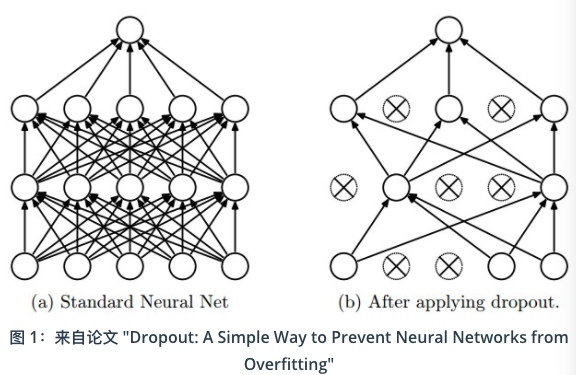

In [50]:
from IPython.display import Image
Image("/Users/shangshuhan/practice/16.png")

TensorFlow 提供了一个tf.nn.dropout()函数，你可以用来实现dropout。  

In [ ]:
keep_prob = tf.placeholder(tf.float32)  # probability to keep units

hidden_layer = tf.add(tf.matmul(features,weights[0]),biases[0])
hidden_layer = tf.nn.relu(hidden_layer)
hidden_layer = tf.nn.dropout(hidden_layer,keep_prob)

logits = tf.add(tf.matmul(hidden_layer,weights[1]),biases[1])

上面的代码展示了如何在神经网络中应用dropout。  
tf.nn.dropout()函数有两个参数：  
1. hidden_layer: 你要应用dropout的tensor
2. keep_prob: 任何一个给定单元的留存率(没有被丢弃的单元)  
keep_prob 可以让你调整丢弃单元的数量。为了补偿被丢弃的单元，tf.nn.dropout()把所有保留下来的单元(没有被丢弃的单元)*1/keep_prob。 

### 注意：
在训练时，一个好的keep_prob的初始值是0.5。  
在测试时，把keep_prob值设为1.0，这样保留所有的单元，最大化模型的能力。
- 只有在训练模型时我们会丢弃单元，在验证或测试时，应该保存所有最大化准确率。 

### 练习
用ReLU层和dropout层构建一个模型，keep_prob的值设为0.5，打印这个模型的logits.

In [54]:
import tensorflow as tf

hidden_layer_weights = [
    [0.1, 0.2, 0.4],
    [0.4, 0.6, 0.6],
    [0.5, 0.9, 0.1],
    [0.8, 0.2, 0.8]]
out_weights = [
    [0.1, 0.6],
    [0.2, 0.1],
    [0.7, 0.9]]

## weights and biases
weights = [tf.Variable(hidden_layer_weights),tf.Variable(out_weights)]
biases = [tf.Variable(tf.zeros(3)),tf.Variable(tf.zeros(2))]

# Input
features = tf.Variable([[0.0, 2.0, 3.0, 4.0], [0.1, 0.2, 0.3, 0.4], [11.0, 12.0, 13.0, 14.0]])

# Create Model with Dropout
keep_prob = tf.placeholder(tf.float32)
hidden_layer = tf.add(tf.matmul(features,weights[0]),biases[0])
hidden_layer = tf.nn.relu(hidden_layer )
hidden_layer = tf.nn.dropout(hidden_layer,keep_prob )

# Print logits from a session
logits = tf.add(tf.matmul(hidden_layer,weights[1]),biases[1])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(logits, feed_dict = {keep_prob: 0.5}))

[[  9.55999947  16.        ]
 [  0.11200001   0.67200011]
 [  0.           0.        ]]
